<aside>
💡 Question-1

You are given a binary tree. The binary tree is represented using the TreeNode class. Each TreeNode has an integer value and left and right children, represented using the TreeNode class itself. Convert this binary tree into a binary search tree.

Input:

        10

       /   \

     2      7

   /   \

 8      4

Output:

        8

      /   \

    4     10

  /   \

2      7

</aside>

In [4]:
# class defination
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def inorder_traversal(root, values):
    if root is None:
        return
    inorder_traversal(root.left, values)
    values.append(root.value)
    inorder_traversal(root.right, values)


def convert_to_bst(root, values, index):
    if root is None:
        return
    convert_to_bst(root.left, values, index)
    root.value = values[index[0]]
    index[0] += 1
    convert_to_bst(root.right, values, index)


def binary_tree_to_bst(root):
    # Step 1: Perform in-order traversal and store node values in a list
    values = []
    inorder_traversal(root, values)

    # Step 2: Sort the list of values in ascending order
    values.sort()

    # Step 3: Replace node values with sorted values from the list
    index = [0]
    convert_to_bst(root, values, index)

# driver code
# Create the binary tree
root = TreeNode(10)
root.left = TreeNode(2)
root.right = TreeNode(7)
root.left.left = TreeNode(8)
root.left.right = TreeNode(4)

# Convert the binary tree to a binary search tree
binary_tree_to_bst(root)

# Test the result
# The binary tree should now represent a binary search tree
# with the values in ascending order
#       8
#     /   \
#    4     10
#   / \
#  2   7

# In-order traversal of the binary search tree should give the sorted values
def inorder_print(root):
    if root is None:
        return
    inorder_print(root.left)
    print(root.value, end=" ")
    inorder_print(root.right)

inorder_print(root)  # Output: 2 4 7 8 10


2 4 7 8 10 

<aside>
💡 Question-2:

Given a Binary Search Tree with all unique values and two keys. Find the distance between two nodes in BST. The given keys always exist in BST.

Example:

Consider the following BST:

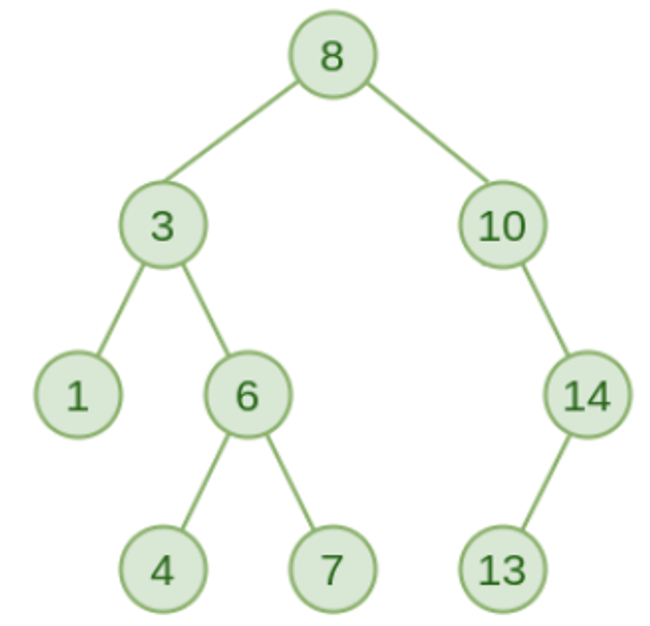

**Input-1:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 6

node-2 = 14

**Output-1:**

The distance between the two keys = 4

**Input-2:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 3

node-2 = 4

**Output-2:**

The distance between the two keys = 2

</aside>

In [3]:
# class defination
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def find_distance(root, node1, node2):
    if root is None:
        return 0

    # If both nodes are smaller than the current node, move to the left subtree
    if node1 < root.value and node2 < root.value:
        return find_distance(root.left, node1, node2)

    # If both nodes are greater than the current node, move to the right subtree
    if node1 > root.value and node2 > root.value:
        return find_distance(root.right, node1, node2)

    # If the current node lies between the two nodes, return the sum of distances from the current node
    if node1 <= root.value <= node2 or node2 <= root.value <= node1:
        return distance_from_node(root, node1) + distance_from_node(root, node2)

    return 0  # Nodes not found


def distance_from_node(root, node):
    if root is None:
        return 0
    if root.value == node:
        return 0
    if node < root.value:
        return 1 + distance_from_node(root.left, node)
    return 1 + distance_from_node(root.right, node)

# driver code
# Create the Binary Search Tree
root = TreeNode(8)
root.left = TreeNode(3)
root.left.left = TreeNode(1)
root.left.right = TreeNode(6)
root.left.right.left = TreeNode(4)
root.left.right.right = TreeNode(7)
root.right = TreeNode(10)
root.right.right = TreeNode(14)
root.right.right.left = TreeNode(13)

# Test case 1
node1 = 6
node2 = 14
distance = find_distance(root, node1, node2)
print("The distance between the two keys =", distance)  # Output: 4

# Test case 2
node1 = 3
node2 = 4
distance = find_distance(root, node1, node2)
print("The distance between the two keys =", distance)  # Output: 2


The distance between the two keys = 4
The distance between the two keys = 2


<aside>
💡 Question-3:

Write a program to convert a binary tree to a doubly linked list.

Input:

        10

       /   \

     5     20

           /   \

        30     35

Output:

5 10 30 20 35

</aside>

In [2]:
# class defination
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class DoublyLinkedListNode:
    def __init__(self, value):
        self.value = value
        self.prev = None
        self.next = None


def convert_to_doubly_linked_list(root):
    if root is None:
        return None

    # Perform in-order traversal
    stack = []
    current = root
    prev = None
    head = None

    while current or stack:
        while current:
            stack.append(current)
            current = current.left

        current = stack.pop()

        # Create a new node for the doubly linked list
        new_node = DoublyLinkedListNode(current.value)

        # Set the previous and next pointers
        if prev:
            prev.next = new_node
            new_node.prev = prev
        else:
            head = new_node

        prev = new_node

        current = current.right

    return head


# driver code
# Create the binary tree
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(20)
root.right.left = TreeNode(30)
root.right.right = TreeNode(35)

# Convert the binary tree to a doubly linked list
head = convert_to_doubly_linked_list(root)

# Traverse and print the doubly linked list
current = head
while current:
    print(current.value, end=" ")
    current = current.next


5 10 30 20 35 

<aside>
💡 Question-4:

Write a program to connect nodes at the same level.

Input:

        1

      /   \

    2      3

  /   \   /   \

4     5 6    7

Output:

1 → -1

2 → 3

3 → -1

4 → 5

5 → 6

6 → 7

7 → -1

</aside>

In [5]:
# class defination
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.next = None


def connect_nodes_at_same_level(root):
    if root is None:
        return

    # Perform level-order traversal
    queue = []
    queue.append(root)

    while queue:
        level_size = len(queue)

        for i in range(level_size):
            current = queue.pop(0)

            # Connect the node to its right sibling
            if i < level_size - 1:
                current.next = queue[0]

            # Add the left and right children to the queue
            if current.left:
                queue.append(current.left)
            if current.right:
                queue.append(current.right)

    return root

# driver code
# Create the binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Connect nodes at the same level
connect_nodes_at_same_level(root)

# Print the next pointers
current = root
while current:
    print(current.value, end=" → ")
    if current.next:
        print(current.next.value, end="\n")
    else:
        print("-1")
    current = current.next


1 → -1
